In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_provider import IBMProvider
from qiskit_experiments.library import InterleavedRB
import qiskit.circuit.library as circuits

In [2]:
#Setting the IBM provider
api_file = "../../ibm_API_key"
with open(api_file, "r") as f:
        api_key = f.readline().strip()
provider = IBMProvider(api_key, instance='ibm-q-ncsu/nc-state/quantum-compiler')
backend = provider.get_backend('ibm_brisbane')

In [4]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()

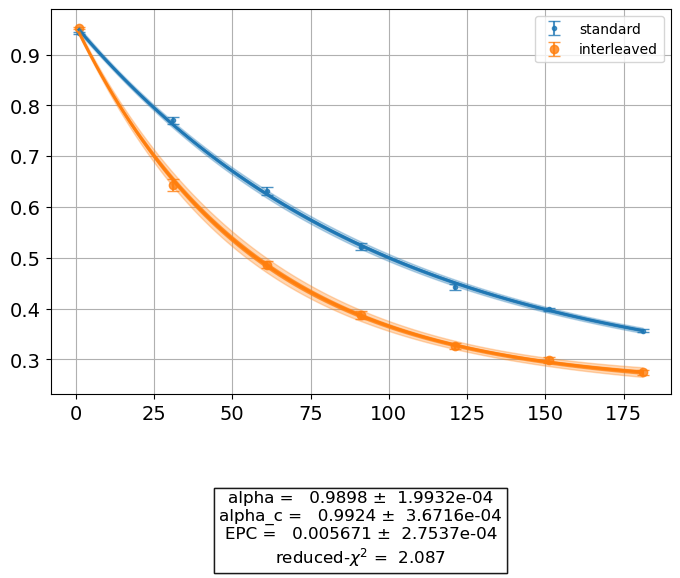

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 25
 - degree of freedom: 10
 - chi-square: 20.87342124133291
 - reduced chi-square: 2.087342124133291
 - Akaike info crit.: 13.591870327454973
 - Bayesian info crit.: 16.148099645916005
 - init params:
  * a = 0.707396185261789
  * alpha = 0.9896772660816643
  * b = 0.25
  * alpha_c = 0.9918215499704032
 - fit params:
  * a = 0.7087341279957619 ± 0.0051634919226181955
  * alpha = 0.9897528825594321 ± 0.00019932348815767984
  * b = 0.24741362231031222 ± 0.005156059598283743
  * alpha_c = 0.9924382977609514 ± 0.0003671601546129411
 - correlations:
  * (a, b) = -0.930163423620129
  * (alpha, b) = -0.9135031042045875
  * (b, alpha_c) = -0.6418570132231475
  * (alpha, alpha_c) = 0.510835647756331
  * (a, alpha_c) =

In [5]:
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)